In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',1000) 
%matplotlib inline

In [2]:
path = ""
file_name = "train.csv"

In [3]:
# Reading the dataset
house_df = pd.read_csv(f"{path}{file_name}",na_values="NAN")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dv = 'SalePrice'

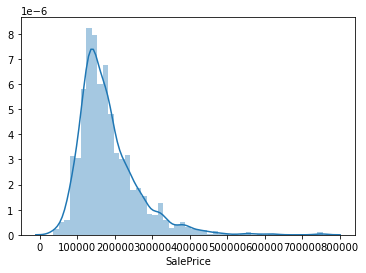

In [6]:
sns.distplot(house_df[dv])

In [7]:
## Plotting some initial graphs with DV and IDVs

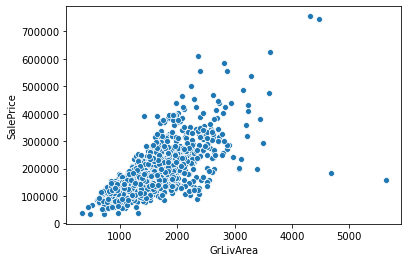

In [8]:
sns.scatterplot(house_df['GrLivArea'],house_df[dv])

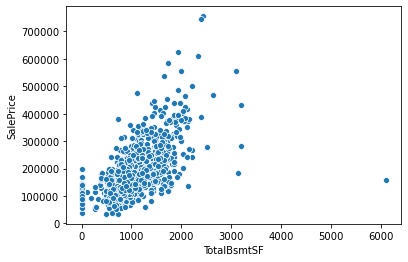

In [9]:
sns.scatterplot(house_df['TotalBsmtSF'],house_df[dv])

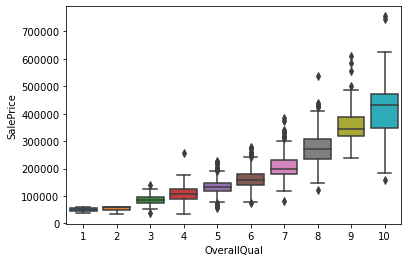

In [10]:
sns.boxplot(x='OverallQual',y=dv,data=house_df)

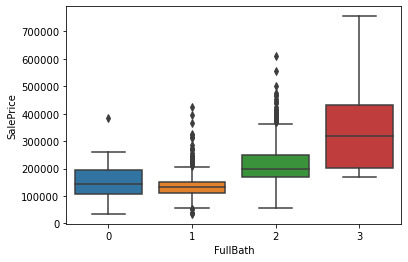

In [11]:
sns.boxplot(x='FullBath',y=dv,data=house_df)

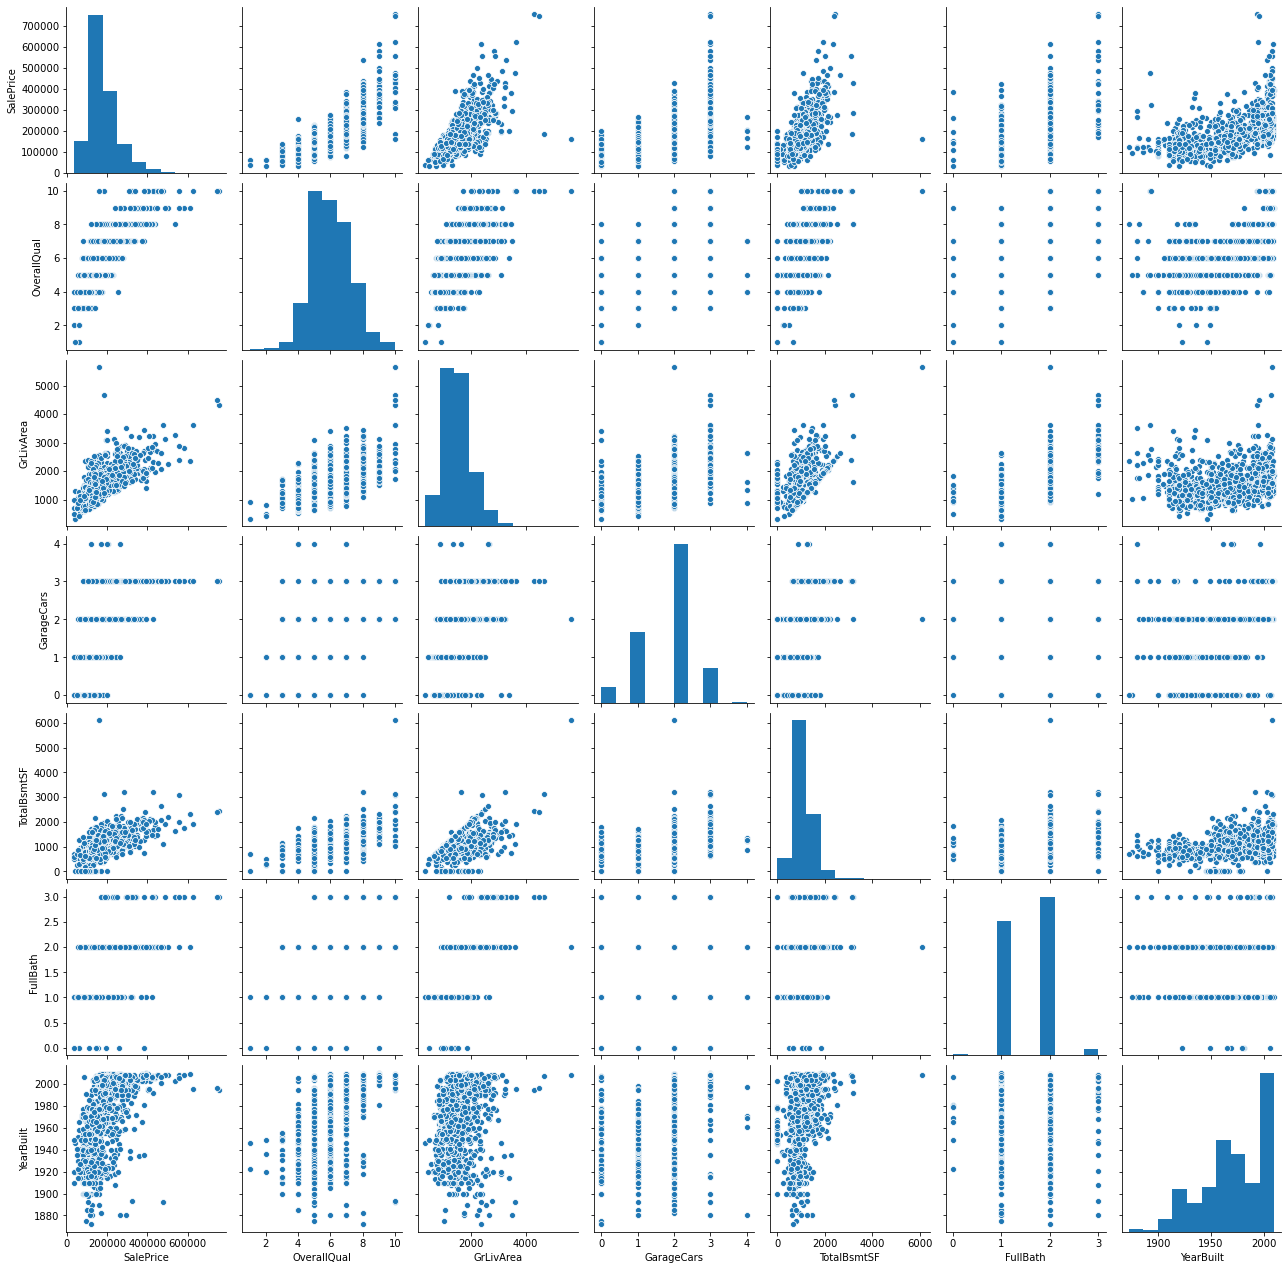

In [12]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_df[cols], size = 2.5)
plt.show();

In [13]:
#Checking the correlations

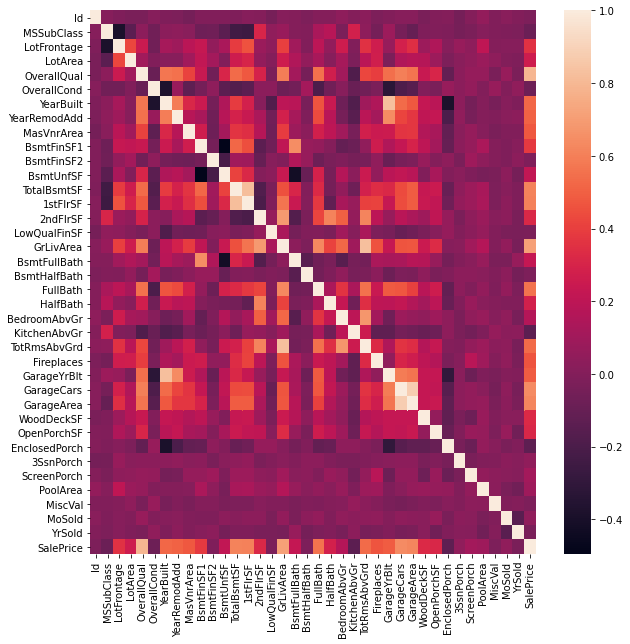

In [14]:
corr = house_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=False)

In [15]:
## Missing Data check

In [16]:
#missing data
(100.*house_df.isnull().sum()/house_df.shape[0]).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

In [17]:
## Some of the missing attributes(ex:"BsmtQual") contains meanings. Imputing them as "Empty"
for col in ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
            "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]:
    house_df[col].fillna("Empty",inplace=True)

In [18]:
#missing data
(100.*house_df.isnull().sum()/house_df.shape[0]).sort_values(ascending=False)[:10]

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
SalePrice       0.000000
ExterCond       0.000000
RoofStyle       0.000000
RoofMatl        0.000000
Exterior1st     0.000000
dtype: float64

In [19]:
##Dropping LotFrontage because of many missing values and imputing the others with their median values
house_df.drop(['LotFrontage'],axis=1,inplace=True)

In [20]:
house_df["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [21]:
house_df["GarageYrBlt"].fillna(house_df["GarageYrBlt"].median(), inplace=True)
house_df["MasVnrArea"].fillna(house_df["MasVnrArea"].median(), inplace=True)
house_df["MasVnrType"].fillna("None", inplace=True)

In [22]:
house_df.dropna(inplace=True)

In [23]:
print(house_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

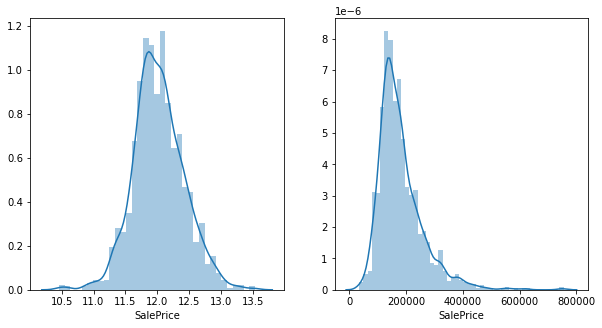

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(np.log(house_df[dv]))
plt.subplot(122)
sns.distplot(house_df[dv])

In [25]:
house_df["TransformedPrice"] = np.log(house_df[dv])

In [26]:
cat_cols = list(house_df.select_dtypes(include=['object']).columns)
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [27]:
# #Label Encoding
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

In [28]:
# help(label_encoder)

In [29]:
house_df['TotalSF'] = house_df['TotalBsmtSF'] + house_df['1stFlrSF'] + house_df['2ndFlrSF']

In [55]:
train_dummies = pd.get_dummies(house_df[cat_cols],drop_first = True)
#train_dummies = house_df[cat_cols].apply(lambda col:pd.Categorical(col).codes)
train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Empty,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_Empty,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_Empty,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Empty,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0

In [56]:
X = house_df.select_dtypes(exclude=['object'])
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedPrice,TotalSF
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,2566
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,2524
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,2706
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,2473
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,3343


In [57]:
X = pd.concat([X,train_dummies],axis =1)

In [58]:
X = X.drop(["Id", "SalePrice","TransformedPrice"], axis=1)
y = house_df["TransformedPrice"]

In [59]:
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Empty,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_Empty,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_Empty,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Empty,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_F

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# help(scalar)

In [62]:
idvs = X.columns
idvs

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

In [63]:
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X))

In [64]:
X.columns = idvs

In [65]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [66]:
X_train.shape

(1021, 259)

In [67]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [68]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [70]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,15,20,25,50, 100,
                   500,700,800, 1000,2000,3000,4000,5000,6000,7000,8000
                   ]}

In [88]:
# Applying Ridge
ridge = Ridge(random_state=0)

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        #scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15, 20,
                                   25, 50, 100, 500, 700, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [89]:
model_cv_ridge.best_estimator_

Ridge(alpha=500, random_state=0)

In [90]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge[['param_alpha','mean_test_score','std_test_score','mean_train_score','std_train_score']]

,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.0001,0.711277,0.301284,0.958144,0.004934
1,0.001,0.711803,0.300244,0.958144,0.004934
2,0.01,0.716808,0.290341,0.958144,0.004934
3,0.05,0.734640,0.255139,0.958143,0.004934
4,0.1,0.750126,0.224703,0.958141,0.004935
5,0.2,0.769240,0.187426,0.958136,0.004936
6,0.3,0.780543,0.165647,0.958130,0.004938
7,0.4,0.788006,0.151452,0.958122,0.004939
8,0.5,0.793308,0.141505,0.958113,0.004940
9,0.6,0.797275,0.134168,0.958103,0.004941


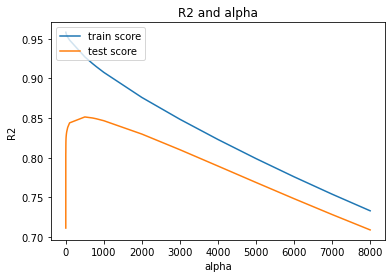

In [92]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
alpha = 3000
##alpha = 0.05
ridge = Ridge(alpha=alpha,random_state=0)

ridge.fit(X_train, y_train)

Ridge(alpha=3000, random_state=0)

In [94]:
ridge_coef_df = pd.DataFrame({"idvs":idvs,"coef":ridge.coef_})
ridge_coef_df['abs_coef'] = ridge_coef_df['coef'].abs()

ridge_coef_df.sort_values('abs_coef',inplace=True,ascending=False)
ridge_coef_df

,idvs,coef,abs_coef
2,OverallQual,2.231500e-02,2.231500e-02
35,TotalSF,1.989036e-02,1.989036e-02
14,GrLivArea,1.959128e-02,1.959128e-02
24,GarageCars,1.553798e-02,1.553798e-02
11,1stFlrSF,1.539231e-02,1.539231e-02
21,TotRmsAbvGrd,1.534764e-02,1.534764e-02
25,GarageArea,1.464839e-02,1.464839e-02
22,Fireplaces,1.371590e-02,1.371590e-02
10,TotalBsmtSF,1.370779e-02,1.370779e-02
17,FullBath,1.335414e-02,1.335414e-02


In [95]:
print("Total number of idvs",ridge_coef_df.shape[0])
print("Total number of non-zero coef idvs",ridge_coef_df[ridge_coef_df.coef!=0].shape[0])

Total number of idvs 259
Total number of non-zero coef idvs 259


In [96]:
print("Ridge R2 score:\n\tVAL R2 score: {}\n\tDEV R2 score: {}".format(r2_score(y_test,ridge.predict(X_test)),r2_score(y_train,ridge.predict(X_train))))
print("Ridge MAE: \n\tVAL:{}\n\tDEV:{}".format(mean_absolute_error(y_test,ridge.predict(X_test)),mean_absolute_error(y_train,ridge.predict(X_train))))

Ridge R2 score:
	VAL R2 score: 0.8209906467982816
	DEV R2 score: 0.8597811288139416
Ridge MAE: 
	VAL:0.11075591471699046
	DEV:0.10375136058900446


In [97]:
# Applying Lasso
lasso = Lasso(random_state=0)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        #scoring= 'neg_mean_absolute_error', 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    5.0s finished


GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15, 20,
                                   25, 50, 100, 500, 700, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [98]:
model_cv.best_estimator_

Lasso(alpha=0.001, random_state=0)

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','mean_test_score','std_test_score','mean_train_score','std_train_score']]

,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.0001,0.827018,0.090609,0.957938,0.004919
1,0.001,0.837830,0.099691,0.952783,0.004851
2,0.01,0.832002,0.109632,0.920663,0.005235
3,0.05,0.773140,0.076125,0.800617,0.017819
4,0.1,0.694900,0.050422,0.713833,0.020333
5,0.2,0.467042,0.008250,0.477559,0.026604
6,0.3,0.131769,0.028775,0.136735,0.030155
7,0.4,-0.004026,0.002906,0.000000,0.000000
8,0.5,-0.004026,0.002906,0.000000,0.000000
9,0.6,-0.004026,0.002906,0.000000,0.000000


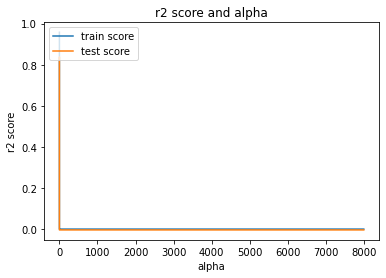

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')

plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [101]:
alpha = 0.05

lasso = Lasso(alpha=alpha,random_state=0)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.05, random_state=0)

In [102]:
lasso_coef_df = pd.DataFrame({"idvs":idvs,"coef":lasso.coef_})
lasso_coef_df['abs_coef'] = lasso_coef_df['coef'].abs()

lasso_coef_df.sort_values('abs_coef',inplace=True,ascending=False)
lasso_coef_df

,idvs,coef,abs_coef
2,OverallQual,0.128287,0.128287
35,TotalSF,0.111039,0.111039
24,GarageCars,0.049026,0.049026
4,YearBuilt,0.025148,0.025148
5,YearRemodAdd,0.024552,0.024552
22,Fireplaces,0.011631,0.011631
195,CentralAir_Y,0.010351,0.010351
39,MSZoning_RM,-0.008482,0.008482
14,GrLivArea,0.006900,0.006900
173,BsmtExposure_No,-0.000000,0.000000


In [103]:
print("Total number of idvs",lasso_coef_df.shape[0])
print("Total number of non-zero coef idvs",lasso_coef_df[lasso_coef_df.coef!=0].shape[0])

Total number of idvs 259
Total number of non-zero coef idvs 9


In [104]:
print("Ridge R2 score:\n\tVAL R2 score: {}\n\tDEV R2 score: {}".format(r2_score(y_test,lasso.predict(X_test)),r2_score(y_train,lasso.predict(X_train))))
print("Ridge MAE: \n\tVAL:{}\n\tDEV:{}".format(mean_absolute_error(y_test,lasso.predict(X_test)),mean_absolute_error(y_train,lasso.predict(X_train))))

Ridge R2 score:
	VAL R2 score: 0.8035164590976619
	DEV R2 score: 0.7987334684015059
Ridge MAE: 
	VAL:0.11887508583538706
	DEV:0.12422847281965366


In [105]:
y_pred_lasso = lasso.predict(X_test)

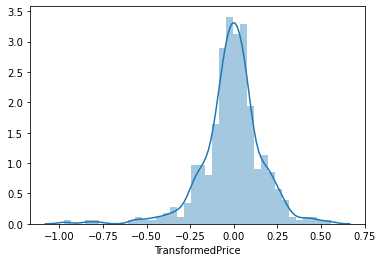

In [106]:
sns.distplot((y_test-y_pred_lasso))

In [107]:
y_pred_ridge = ridge.predict(X_test)

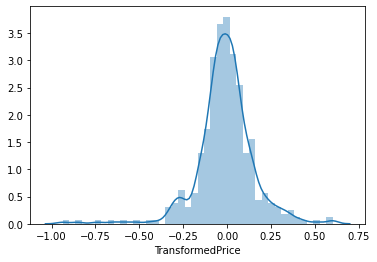

In [108]:
sns.distplot((y_test-y_pred_ridge))

In [109]:
print("Lasso val and dev R2 value")
r2_score(y_test,lasso.predict(X_test)),r2_score(y_train,lasso.predict(X_train))

Lasso val and dev R2 value


(0.8035164590976619, 0.7987334684015059)

In [110]:
print("Ridge val and dev R2 value")
r2_score(y_test,ridge.predict(X_test)),r2_score(y_train,ridge.predict(X_train))

Ridge val and dev R2 value


(0.8209906467982816, 0.8597811288139416)

In [111]:
print("Lasso MAE - VAL:{},DEV:{}".format(mean_absolute_error(y_test,lasso.predict(X_test)),mean_absolute_error(y_train,lasso.predict(X_train))))
print("Ridge MAE - VAL:{},DEV:{}".format(mean_absolute_error(y_test,ridge.predict(X_test)),mean_absolute_error(y_train,ridge.predict(X_train))))

Lasso MAE - VAL:0.11887508583538706,DEV:0.12422847281965366
Ridge MAE - VAL:0.11075591471699046,DEV:0.10375136058900446


### Based on the above observation we can pick lasso regression as the model.
Optimal alpha values:
    1. Lasso - 0.05 dev(R2 score:0.79,MAE:0.12), Val(R2 score: 0.80, MAE: 0.11)
    2. Ridge - 3000 dev(R2 score:0.85,MAE:0.10), Val(R2 score: 0.82, MAE: 0.11)

In [112]:
## When doubling the alpha

In [113]:
alpha = 0.05*2

lasso_double = Lasso(alpha=alpha,random_state=0)
        
lasso_double.fit(X_train, y_train) 
lasso_double_coef_df = pd.DataFrame({"idvs":idvs,"coef":lasso_double.coef_})
lasso_double_coef_df['abs_coef'] = lasso_double_coef_df['coef'].abs()

lasso_double_coef_df.sort_values('abs_coef',inplace=True,ascending=False)
lasso_double_coef_df

,idvs,coef,abs_coef
2,OverallQual,0.131682,0.131682
35,TotalSF,0.097457,0.097457
24,GarageCars,0.033245,0.033245
4,YearBuilt,0.012893,0.012893
5,YearRemodAdd,0.002370,0.002370
171,BsmtExposure_Gd,0.000000,0.000000
176,BsmtFinType1_GLQ,0.000000,0.000000
175,BsmtFinType1_Empty,-0.000000,0.000000
174,BsmtFinType1_BLQ,-0.000000,0.000000
173,BsmtExposure_No,-0.000000,0.000000


In [116]:
print("Total number of idvs",lasso_double_coef_df.shape[0])
print("Total number of non-zero coef idvs",lasso_double_coef_df[lasso_double_coef_df.coef!=0].shape[0])

Total number of idvs 259
Total number of non-zero coef idvs 5


In [115]:
print("Lasso R2 - VAL:{},DEV:{}".format(r2_score(y_test,lasso_double.predict(X_test)),r2_score(y_train,lasso_double.predict(X_train))))
print("Lasso MAE - VAL:{},DEV:{}".format(mean_absolute_error(y_test,lasso_double.predict(X_test)),mean_absolute_error(y_train,lasso_double.predict(X_train))))

Lasso R2 - VAL:0.715577458277205,DEV:0.7123631354069588
Lasso MAE - VAL:0.1475088523353169,DEV:0.15674141214500398


In [117]:
alpha = 3000*2
##alpha = 0.05
ridge_double = Ridge(alpha=alpha,random_state=0)

ridge_double.fit(X_train, y_train)
ridge_double_coef_df = pd.DataFrame({"idvs":idvs,"coef":ridge_double.coef_})
ridge_double_coef_df['abs_coef'] = ridge_double_coef_df['coef'].abs()

ridge_double_coef_df.sort_values('abs_coef',inplace=True,ascending=False)
ridge_double_coef_df

,idvs,coef,abs_coef
2,OverallQual,1.743233e-02,1.743233e-02
35,TotalSF,1.638972e-02,1.638972e-02
14,GrLivArea,1.558985e-02,1.558985e-02
24,GarageCars,1.296749e-02,1.296749e-02
11,1stFlrSF,1.263696e-02,1.263696e-02
25,GarageArea,1.245228e-02,1.245228e-02
21,TotRmsAbvGrd,1.207749e-02,1.207749e-02
10,TotalBsmtSF,1.193822e-02,1.193822e-02
22,Fireplaces,1.119281e-02,1.119281e-02
17,FullBath,1.113775e-02,1.113775e-02


In [118]:
print("Total number of idvs",ridge_double_coef_df.shape[0])
print("Total number of non-zero coef idvs",ridge_double_coef_df[ridge_double_coef_df.coef!=0].shape[0])

Total number of idvs 259
Total number of non-zero coef idvs 259


In [119]:
print("Lasso R2 - VAL:{},DEV:{}".format(r2_score(y_test,ridge_double.predict(X_test)),r2_score(y_train,ridge_double.predict(X_train))))
print("Lasso MAE - VAL:{},DEV:{}".format(mean_absolute_error(y_test,ridge_double.predict(X_test)),mean_absolute_error(y_train,ridge_double.predict(X_train))))

Lasso R2 - VAL:0.7629676197530748,DEV:0.7997848306596151
Lasso MAE - VAL:0.12939893575027078,DEV:0.12715936581296416


In [120]:
### Removing the top 5 variables from lasso and rebuilding the model.

In [135]:
print("Top 5 important varibles before removing",list(lasso_coef_df.idvs[:5]))

Top 5 important varibles before removing ['OverallQual', 'TotalSF', 'GarageCars', 'YearBuilt', 'YearRemodAdd']


In [125]:
X_train_removed = X_train.drop(list(lasso_coef_df.idvs[:5]),axis=1)
X_train_removed.head()

,MSSubClass,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Empty,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_Empty,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_Empty,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Empty,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0

In [126]:
# Applying Lasso
lasso = Lasso(random_state=0)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        #scoring= 'neg_mean_absolute_error', 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_removed, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    5.5s finished


GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15, 20,
                                   25, 50, 100, 500, 700, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [127]:
model_cv.best_estimator_

Lasso(alpha=0.001, random_state=0)

In [128]:
cv_results_wo_top_5 = pd.DataFrame(model_cv.cv_results_)
cv_results_wo_top_5[['param_alpha','mean_test_score','std_test_score','mean_train_score','std_train_score']]

,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.0001,0.819169,0.088616,0.953870,0.004583
1,0.001,0.829560,0.094753,0.948745,0.004425
2,0.01,0.815306,0.112099,0.913908,0.005332
3,0.05,0.729523,0.088872,0.768991,0.018551
4,0.1,0.606592,0.065665,0.635341,0.022340
5,0.2,0.297516,0.011937,0.308888,0.035498
6,0.3,-0.004026,0.002906,0.000000,0.000000
7,0.4,-0.004026,0.002906,0.000000,0.000000
8,0.5,-0.004026,0.002906,0.000000,0.000000
9,0.6,-0.004026,0.002906,0.000000,0.000000


In [132]:
alpha = 0.001

lasso_removed = Lasso(alpha=alpha,random_state=0)
        
lasso_removed.fit(X_train, y_train) 
lasso_removed_coef_df = pd.DataFrame({"idvs":idvs,"coef":lasso_removed.coef_})
lasso_removed_coef_df['abs_coef'] = lasso_removed_coef_df['coef'].abs()

lasso_removed_coef_df.sort_values('abs_coef',inplace=True,ascending=False)
lasso_removed_coef_df

,idvs,coef,abs_coef
237,PoolQC_Gd,-0.114475,0.114475
38,MSZoning_RL,0.081225,0.081225
35,TotalSF,0.079642,0.079642
14,GrLivArea,0.073446,0.073446
39,MSZoning_RM,0.059374,0.059374
2,OverallQual,0.055609,0.055609
4,YearBuilt,0.052495,0.052495
36,MSZoning_FV,0.044880,0.044880
3,OverallCond,0.043920,0.043920
25,GarageArea,0.032486,0.032486


In [133]:
print("Total number of idvs",lasso_removed_coef_df.shape[0])
print("Total number of non-zero coef idvs",lasso_removed_coef_df[lasso_removed_coef_df.coef!=0].shape[0])

Total number of idvs 259
Total number of non-zero coef idvs 173


In [134]:
print("Lasso R2 - VAL:{},DEV:{}".format(r2_score(y_test,lasso_removed.predict(X_test)),r2_score(y_train,lasso_removed.predict(X_train))))
print("Lasso MAE - VAL:{},DEV:{}".format(mean_absolute_error(y_test,lasso_removed.predict(X_test)),mean_absolute_error(y_train,lasso_removed.predict(X_train))))

Lasso R2 - VAL:0.6667958984677917,DEV:0.9476916452533968
Lasso MAE - VAL:0.09556315986106073,DEV:0.06327201488272992


In [136]:
# Top 5 variables after the removal of top 5 varibales from all variable version.
list(lasso_removed_coef_df['idvs'][:5])

['PoolQC_Gd', 'MSZoning_RL', 'TotalSF', 'GrLivArea', 'MSZoning_RM']